In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import states_name as states
import seaborn as sns

plt.style.use("seaborn-colorblind")

In [280]:
#zillow columns to use
# zillow_cols = ['RegionID','SizeRank','RegionName','RegionType','StateName','State','Metro','StateCodeFIPS','MunicipalCodeFIPS']
zillow_cols = ['SizeRank','RegionName','State']

#change available dates to COVID dates
start_date = '2019-12-31'
end_date = '2021-02-28'
list_dates = pd.date_range(start_date,end_date, 
              freq='M').strftime("%Y-%m-%d").tolist()

zillow_cols.extend(list_dates)

In [281]:
#read data from zillow and covid
zillow_df = pd.read_csv('data/zhvi_by_county_all_homes.csv', usecols=zillow_cols)
cov = pd.read_csv('data/covid_by_us_counties.csv')
pd.set_option('display.max_columns', None)

#state/county info
states_df = pd.read_csv('data/states.csv')
landmass_df = pd.read_csv('data/county_landmass.csv')
population_df = pd.read_csv('data/county-pop-2019.csv')
population_df['county-state'] = population_df['county-state'].str.replace(' County','')

In [282]:
cov_df = cov.merge(states_df,how='left', left_on='state', right_on='state')
cov_df['county-state'] = cov_df['county'] + ", " + cov_df['code']
cov_df.drop(['state','county','code'], axis=1, inplace=True)


In [283]:
#combine county and state code
zillow_df['county-state'] = zillow_df['RegionName'] + ", " + zillow_df['State']


In [284]:
#Zillow change in typical value for 6 months and cumulative months.
zillow_df['diff-6'] = zillow_df['2020-07-31'] - zillow_df['2020-01-31'] 
zillow_df['diff-cumulative'] = zillow_df['2021-02-28'] - zillow_df['2020-01-31']
zillow_df['county-state'] = zillow_df['county-state'].str.replace(' County','')
zillow_df.head()

SizeRank          RegionName State  2019-12-31  2020-01-31  2020-02-29  \
0         0  Los Angeles County    CA    652445.0    656768.0    662606.0   
1         1         Cook County    IL    253611.0    254567.0    254866.0   
2         2       Harris County    TX    200806.0    200791.0    201119.0   
3         3     Maricopa County    AZ    291097.0    292733.0    294850.0   
4         4    San Diego County    CA    606929.0    610781.0    615269.0   

   2020-03-31  2020-04-30  2020-05-31  2020-06-30  2020-07-31  2020-08-31  \
0    668339.0    673426.0    675389.0    676740.0    681907.0    689445.0   
1    255510.0    255556.0    256071.0    256789.0    258126.0    259837.0   
2    202085.0    203217.0    204199.0    204923.0    205836.0    206945.0   
3    297478.0    301550.0    304743.0    307714.0    310657.0    314576.0   
4    620442.0    624442.0    628566.0    631516.0    635497.0    641772.0   

   2020-09-30  2020-10-31  2020-11-30  2020-12-31  2021-01-31  2021-02-28  \
0    697854.0    704702.0    711230.0    717096.0    722650.0    728703.0   
1    262280.0    264910.0    267224.0    269336.0    270973.0    273625.0   
2    208785.0    210556.0    212743.0    214886.0    217409.0    220051.0   
3    319269.0    324372.0    329853.0    335569.0    342202.0    348717.0   
4    651044.0    661426.0    671730.0    682019.0    692547.0    702933.0   

      county-state   diff-6  diff-cumulative  
0  Los Angeles, CA  25139.0          71935.0  
1         Cook, IL   3559.0          19058.0  
2       Harris, TX   5045.0          19260.0  
3     Maricopa, AZ  17924.0          55984.0  
4    San Diego, CA  24716.0          92152.0

In [285]:
#rearrange Zillow DF columns
new_cols = ['SizeRank','county-state','diff-6','diff-cumulative']
new_cols.extend(list_dates)

zillow_df = zillow_df[new_cols]
zillow_df.sort_values('diff-cumulative')

SizeRank                       county-state   diff-6  diff-cumulative  \
19          19                       New York, NY -16026.0         -44222.0   
65          65                  San Francisco, CA -22495.0         -44025.0   
496        496                          Gregg, TX -17906.0         -24026.0   
2774      2867                           Pope, IL  -7495.0         -20200.0   
2047      2060                       Lawrence, KY  -6091.0         -15872.0   
260        260                           Webb, TX  -4249.0         -11041.0   
450        450                        Midland, TX  -3837.0          -9033.0   
2819      2950                         Hanson, SD  -1520.0          -7935.0   
2451      2491                      Humphreys, MS   -617.0          -7771.0   
944        946                        Pulaski, MO  -5465.0          -7246.0   
1801      1808                Richland Parish, LA  -3208.0          -7156.0   
1021      1024                           Hoke, NC   1785.0          -6242.0   
936        938                        Johnson, MO   4049.0          -6079.0   
2835      3008                       Renville, ND   8669.0          -5800.0   
2753      2833                        Cameron, PA   -810.0          -5678.0   
2135      2150                    Mississippi, MO  -2438.0          -5405.0   
1417      1422                          Bryan, GA  -7735.0          -5305.0   
2301      2325                     Pushmataha, OK    659.0          -5265.0   
2245      2267                         Powell, KY  -3261.0          -5155.0   
2842      3036                       Keweenaw, MI  -3834.0          -5038.0   
599        599               Lafourche Parish, LA  -3625.0          -4770.0   
853        854                         Oldham, KY  -2613.0          -4719.0   
2102      2117                 LaSalle Parish, LA  -1929.0          -4593.0   
841        842                           Ward, ND  -2660.0          -4494.0   
989        992                        Clinton, IA   1132.0          -4439.0   
324        324               Calcasieu Parish, LA  -4256.0          -4411.0   
950        952            Saint Martin Parish, LA  -1251.0          -4310.0   
2224      2244                       Lawrence, MS    996.0          -4288.0   
2850      3066                        Sherman, OR -10715.0          -4280.0   
1489      1494                          Yazoo, MS  -3116.0          -4201.0   
2741      2817                         Dickey, ND  -2877.0          -3893.0   
1774      1781                       Stutsman, ND  -3006.0          -3549.0   
1628      1634                         Upshur, WV  -3451.0          -3283.0   
448        448                          Ector, TX  -1228.0          -3216.0   
2758      2838                         Putnam, MO  -1275.0          -3197.0   
2292      2316                         Zavala, TX  -1824.0          -3149.0   
2591      2639                          Major, OK  -1203.0          -3132.0   
1399      1404                     Muhlenberg, KY  -2077.0          -3068.0   
2729      2796                       Gallatin, IL   -267.0          -3034.0   
2118      2133                         Estill, KY  -2819.0          -2937.0   
2131      2146                         Newton, TX  -3826.0          -2900.0   
1662      1668              Assumption Parish, LA  -1309.0          -2783.0   
2251      2273                Jefferson Davis, MS    -59.0          -2700.0   
2740      2814                          Toole, MT     43.0          -2696.0   
1276      1280              Beauregard Parish, LA    273.0          -2593.0   
2828      2979                        Stanley, SD  -2359.0          -2536.0   
1179      1182                          Floyd, KY  -2255.0          -2457.0   
1378      1383                          Adams, MS   -417.0          -2383.0   
784        785                    Grand Forks, ND  -3389.0          -2222.0   
2790      2897                        Edmunds, SD  -5617

In [286]:
zillow_melt_df = pd.melt(zillow_df, id_vars=['SizeRank','county-state'],value_vars=list_dates,var_name='date', value_name='zhvi')
zillow_melt_df[zillow_melt_df['county-state'] == 'Los Angeles, CA']
zillow_melt_df.sort_values(['SizeRank','date'],inplace=True)


In [287]:
# cov_df.groupby(pd.Grouper(key="date")).sum()[['cases','deaths']]


In [288]:
# pd.pivot_table(cov_df,'no of medals', ['Year', 'Country'], 'medal')

In [289]:
cov_df[cov_df['date'].isin(list_dates)]

date     fips  cases  deaths     county-state
33       2020-01-31   4013.0      1     0.0     Maricopa, AZ
34       2020-01-31   6037.0      1     0.0  Los Angeles, CA
35       2020-01-31   6059.0      1     0.0       Orange, CA
36       2020-01-31   6085.0      1     0.0  Santa Clara, CA
37       2020-01-31  17031.0      2     0.0         Cook, IL
...             ...      ...    ...     ...              ...
1076219  2021-02-28  56037.0   3759    34.0   Sweetwater, WY
1076220  2021-02-28  56039.0   3351     9.0        Teton, WY
1076221  2021-02-28  56041.0   2053    12.0        Uinta, WY
1076222  2021-02-28  56043.0    880    26.0     Washakie, WY
1076223  2021-02-28  56045.0    622     5.0       Weston, WY

[37173 rows x 5 columns]

In [290]:
ye_df = pd.DataFrame(cov_df['county-state'].unique(), columns=['county-state'])
ye_df['date'] = '2019-12-31'
ye_df['cases'] = 0
ye_df['deaths'] = 0

In [291]:
cov_df2 = cov_df.append(ye_df)
cov_df2.sort_values(['county-state','date'],inplace=True)


In [292]:
combined_df = pd.merge(cov_df2, zillow_melt_df,  how='inner', left_on=['date','county-state'], right_on = ['date','county-state'])

In [293]:
pd.set_option('display.max_rows', 10000)
combined_df[combined_df['county-state']=='Los Angeles, CA']


date    fips    cases   deaths     county-state  SizeRank  \
18763  2019-12-31     NaN        0      0.0  Los Angeles, CA         0   
18764  2020-01-31  6037.0        1      0.0  Los Angeles, CA         0   
18765  2020-02-29  6037.0        1      0.0  Los Angeles, CA         0   
18766  2020-03-31  6037.0     3011     54.0  Los Angeles, CA         0   
18767  2020-04-30  6037.0    23182   1111.0  Los Angeles, CA         0   
18768  2020-05-31  6037.0    54996   2362.0  Los Angeles, CA         0   
18769  2020-06-30  6037.0   103529   3369.0  Los Angeles, CA         0   
18770  2020-07-31  6037.0   188481   4621.0  Los Angeles, CA         0   
18771  2020-08-31  6037.0   241768   5784.0  Los Angeles, CA         0   
18772  2020-09-30  6037.0   270299   6576.0  Los Angeles, CA         0   
18773  2020-10-31  6037.0   307618   7071.0  Los Angeles, CA         0   
18774  2020-11-30  6037.0   401034   7655.0  Los Angeles, CA         0   
18775  2020-12-31  6037.0   770915  10345.0  Los Angeles, CA         0   
18776  2021-01-31  6037.0  1117346  16770.0  Los Angeles, CA         0   
18777  2021-02-28  6037.0  1192559  21435.0  Los Angeles, CA         0   

           zhvi  
18763  652445.0  
18764  656768.0  
18765  662606.0  
18766  668339.0  
18767  673426.0  
18768  675389.0  
18769  676740.0  
18770  681907.0  
18771  689445.0  
18772  697854.0  
18773  704702.0  
18774  711230.0  
18775  717096.0  
18776  722650.0  
18777  728703.0

In [294]:
combined_df['otm-cases'] = combined_df[combined_df['county-state']=='Los Angeles, CA'].cases.diff()
combined_df.fillna(0, inplace=True)
combined_df[combined_df['county-state']=='Los Angeles, CA']

date    fips    cases   deaths     county-state  SizeRank  \
18763  2019-12-31     0.0        0      0.0  Los Angeles, CA         0   
18764  2020-01-31  6037.0        1      0.0  Los Angeles, CA         0   
18765  2020-02-29  6037.0        1      0.0  Los Angeles, CA         0   
18766  2020-03-31  6037.0     3011     54.0  Los Angeles, CA         0   
18767  2020-04-30  6037.0    23182   1111.0  Los Angeles, CA         0   
18768  2020-05-31  6037.0    54996   2362.0  Los Angeles, CA         0   
18769  2020-06-30  6037.0   103529   3369.0  Los Angeles, CA         0   
18770  2020-07-31  6037.0   188481   4621.0  Los Angeles, CA         0   
18771  2020-08-31  6037.0   241768   5784.0  Los Angeles, CA         0   
18772  2020-09-30  6037.0   270299   6576.0  Los Angeles, CA         0   
18773  2020-10-31  6037.0   307618   7071.0  Los Angeles, CA         0   
18774  2020-11-30  6037.0   401034   7655.0  Los Angeles, CA         0   
18775  2020-12-31  6037.0   770915  10345.0  Los Angeles, CA         0   
18776  2021-01-31  6037.0  1117346  16770.0  Los Angeles, CA         0   
18777  2021-02-28  6037.0  1192559  21435.0  Los Angeles, CA         0   

           zhvi  otm-cases  
18763  652445.0        0.0  
18764  656768.0        1.0  
18765  662606.0        0.0  
18766  668339.0     3010.0  
18767  673426.0    20171.0  
18768  675389.0    31814.0  
18769  676740.0    48533.0  
18770  681907.0    84952.0  
18771  689445.0    53287.0  
18772  697854.0    28531.0  
18773  704702.0    37319.0  
18774  711230.0    93416.0  
18775  717096.0   369881.0  
18776  722650.0   346431.0  
18777  728703.0    75213.0

In [295]:
# Number of counties in combined DF
len(combined_df['county-state'].unique())

2718

/Users/tonymbp/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


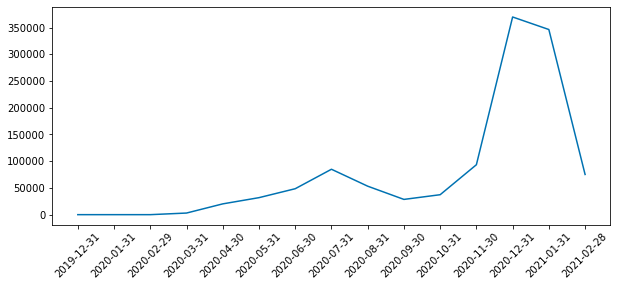

In [296]:
fig, ax = plt.subplots(figsize=(10,4))
x_date = combined_df[combined_df['county-state']=='Los Angeles, CA']['date']
y_cases = combined_df[combined_df['county-state']=='Los Angeles, CA']['otm-cases']

ax.set_xticklabels(x_date,rotation=45)
ax.plot(x_date, y_cases)

/Users/tonymbp/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


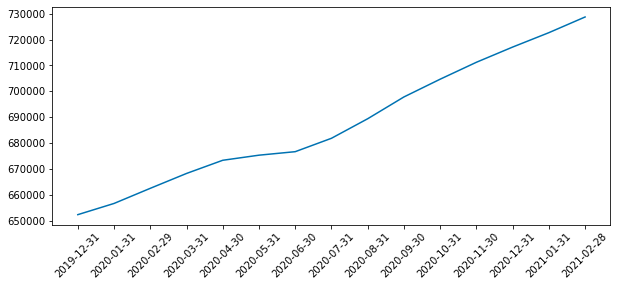

In [297]:
fig, ax = plt.subplots(figsize=(10,4))
y_zhvi = combined_df[combined_df['county-state']=='Los Angeles, CA']['zhvi']
ax.set_xticklabels(combined_df[combined_df['county-state']=='Los Angeles, CA']['date'],rotation=45)
ax.plot(x_date, y_zhvi)

In [298]:
y_cases.corr(y_zhvi, method='pearson')

0.6757854895680049

In [299]:
def county_corr(county):
    
    df = combined_df.copy()
    
    df['otm-cases'] = df[df['county-state']==county].cases.diff()
    df.fillna(0, inplace=True)    
    
    y_cases = df[df['county-state']==county]['otm-cases']
    y_zhvi = df[df['county-state']==county]['zhvi']
    
    return y_cases.corr(y_zhvi, method='pearson')


In [300]:
# to test county_corr defined function
county1 = 'San Francisco, CA'

print(f'Correlation based on function: {county_corr(county1)}')

cases = combined_df[combined_df['county-state']==county1]['otm-cases']
zhvi = combined_df[combined_df['county-state']==county1]['zhvi']

cases.corr(zhvi, method='pearson')
print(f'Correlation based on filter: {county_corr(county1)}')

Correlation based on function: -0.7790401283278209
Correlation based on filter: -0.7790401283278209


In [301]:
compiled_corr_df = pd.DataFrame(combined_df['county-state'].unique(),columns=['county-state'])

In [302]:
compiled_corr_df['correlation'] =  compiled_corr_df['county-state'].apply(county_corr)


In [303]:
compiled_corr_df = pd.merge(compiled_corr_df, zillow_df[['SizeRank','county-state']], how='left', left_on='county-state', right_on='county-state')
compiled_corr_df = pd.merge(compiled_corr_df, landmass_df[['county-state','land_sq_mi']], how='left', left_on='county-state', right_on='county-state')
compiled_corr_df = pd.merge(compiled_corr_df, population_df, how='left', left_on='county-state', right_on='county-state')

In [304]:
compiled_corr_df['pop-density'] = compiled_corr_df['POPESTIMATE2019'] / compiled_corr_df['land_sq_mi']
compiled_corr_df["rank-pop-dense"] = compiled_corr_df['pop-density'].rank(ascending=False)
compiled_corr_df.sort_values("rank-pop-dense").head()

county-state  correlation  SizeRank  land_sq_mi  POPESTIMATE2019  \
2188  San Francisco, CA    -0.779040        65       46.69           881549   
1142         Hudson, NJ     0.587502        93       46.69           672391   
2346        Suffolk, MA     0.664342        79       58.52           803907   
1965   Philadelphia, PA     0.604378        20      135.09          1584064   
77        Arlington, VA     0.710012       297       25.87           236842   

       pop-density  rank-pop-dense  
2188  18880.895267             1.0  
1142  14401.177982             2.0  
2346  13737.303486             3.0  
1965  11725.990081             4.0  
77     9155.083108             5.0

/Users/tonymbp/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='correlation', ylabel='rank-pop-dense'>

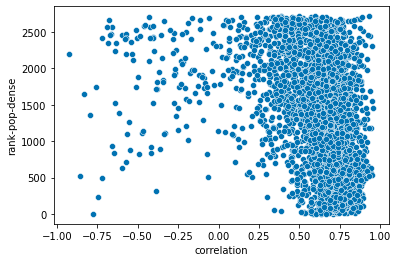

In [305]:
sns.scatterplot(compiled_corr_df['correlation'], compiled_corr_df['rank-pop-dense'])

In [306]:
compiled_corr_df.sort_values("SizeRank")

county-state  correlation  SizeRank  land_sq_mi  \
1494                   Los Angeles, CA     0.675785         0     4060.87   
553                           Cook, IL     0.633283         1      945.68   
1053                        Harris, TX     0.744513         2     1728.83   
1557                      Maricopa, AZ     0.699666         3     9203.14   
2187                     San Diego, CA     0.748655         4     4199.89   
1869                        Orange, CA     0.684114         5      789.40   
1667                    Miami-Dade, FL     0.626632         7     1946.06   
632                         Dallas, TX     0.797584         8      879.60   
2128                     Riverside, CA     0.651539        10     7207.37   
2186                San Bernardino, CA     0.638007        11    20052.50   
461                          Clark, NV     0.697203        12     7910.34   
1313                          King, WA     0.763221        13     2126.04   
2599                         Wayne, MI     0.509565        14      614.15   
2387                       Tarrant, TX     0.819426        15      863.42   
2208                   Santa Clara, CA     0.714026        16     1290.69   
248                        Broward, FL     0.676859        17     1205.40   
181                          Bexar, TX     0.759301        18     1246.82   
1965                  Philadelphia, PA     0.604378        20      135.09   
24                         Alameda, CA     0.713330        21      737.57   
1669                     Middlesex, MA     0.669268        22      823.46   
2347                       Suffolk, NY     0.629579        23      912.20   
2171                    Sacramento, CA     0.729962        24      965.65   
1789                        Nassau, NY     0.575333        26      286.69   
1912                    Palm Beach, FL     0.718924        27     1974.11   
620                       Cuyahoga, OH     0.699175        28      458.49   
1107                  Hillsborough, FL     0.703048        29     1050.91   
40                       Allegheny, PA     0.735018        30      730.17   
1838                       Oakland, MI     0.624774        31      872.51   
848                       Franklin, OH     0.729214        32      539.87   
1083                      Hennepin, MN     0.562415        33      556.62   
1870                        Orange, FL     0.721700        34      907.45   
781                        Fairfax, VA     0.704625        35      395.04   
549                   Contra Costa, CA     0.703018        36      719.95   
2181                     Salt Lake, UT     0.763419        37      737.38   
2437                        Travis, TX     0.691663        38      989.30   
1988                          Pima, AZ     0.710727        40     9186.27   
1736                    Montgomery, MD     0.657237        41      495.52   
1119                      Honolulu, HI     0.340561        42      599.77   
2619                   Westchester, NY     0.573741        43      432.82   
1683                     Milwaukee, WI     0.597967        44      241.56   
863                         Fresno, CA     0.667053        45     5962.73   
2270                        Shelby, TN     0.720965        46      754.53   
867                         Fulton, GA     0.752466        47      528.66   
1637                   Mecklenburg, NC     0.777237        48      526.28   
766                           Erie, NY     0.801818        49     1044.21   
720                         DuPage, IL     0.632882        50      333.61   
782                      Fairfield, CT     0.688792        51      625.80   
1991                      Pinellas, FL     0.742796        52      279.92   
172                         Bergen, NJ     0.661455        53      234.17   
1566                        Marion, IN     0.642399        54      396.25   
2520                          Wake, NC     0.833676        55      831.92   
1064                  

In [307]:
# population_df[population_df['county-state']=="Los Angeles, CA"]

In [308]:
# population_df.sort_values('POPESTIMATE2019', ascending=False)